In [26]:

from IPython import display
from matplotlib import pyplot as plt
import mxnet as mx
from mxnet import nd, autograd
from mxnet.gluon import nn, loss as gloss

Basic ussage

In [27]:
loss = gloss.L2Loss()

And then feed two inputs to compute the elementwise loss values.

In [28]:
x = nd.ones((2, ))
y = nd.ones((2,)) * 2
val = loss(x, y)

print(x)
print(y)
print(val)



[1. 1.]
<NDArray 2 @cpu(0)>

[2. 2.]
<NDArray 2 @cpu(0)>

[0.5 0.5]
<NDArray 2 @cpu(0)>


Using loss function to compute gradiants

In [29]:
X = nd.random.uniform(shape =(2, 4))
print(X)

net = nn.Dense(1)
net.initialize()
with autograd.record():
    l = loss(net(X), y)
print(l)



[[0.56804454 0.3927848  0.92559665 0.83607876]
 [0.07103606 0.33739617 0.08712929 0.6481719 ]]
<NDArray 2x4 @cpu(0)>

[1.8988874 1.931504 ]
<NDArray 2 @cpu(0)>


In [30]:
def plot(x, y):
    display.set_matplotlib_formats('svg')
    plt.plot(x.asnumpy(), y.asnumpy())
    plt.xlabel('x')
    plt.ylabel('loss')
    plt.show()

def show_regression_loss(loss):
    x = nd.arange(-5, 5, .1)
    y = loss(x, nd.zeros_like(x))    
    plot(x, y)

Plot classifcation losses


In [31]:
def show_classification_loss(loss):
    x = nd.arange(-5, 5, .1)
    y = loss(x, nd.ones_like(x))
    plot(x, y)
    

L1 Loss : Mean Absolute Error, computes the sum of absolute distance between target values and output

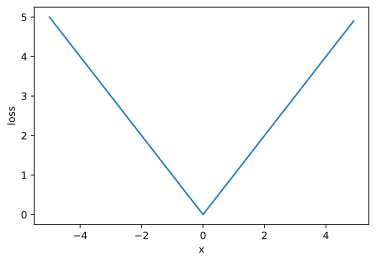

In [32]:
show_regression_loss(gloss.L1Loss())

L2 Loss : Mean Squared Error , regression loss function that computes the squared distance between the target value and output of neural net.

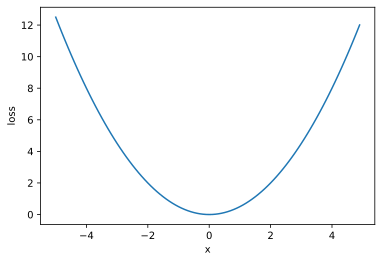

In [33]:
show_regression_loss(gloss.L2Loss())

Huber loss : Combines advantage of both L1 and L2 loss.

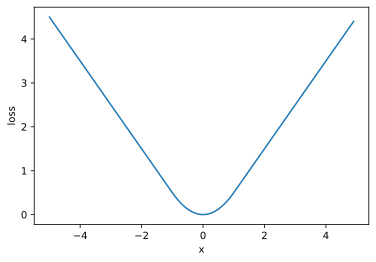

In [34]:
show_regression_loss(gloss.HuberLoss(rho = 1))

Cross Entropy Loss With Sigmoid

Binary Cross Entropy is a loss function used for binary classification e.g. classifying images into 2 classes. Cross entropy measures the difference between tow probability distributions.


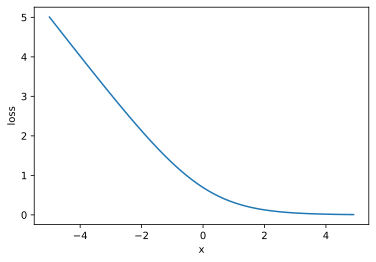

In [35]:
show_classification_loss(gloss.SigmoidBinaryCrossEntropyLoss())

Corss Entopy Loss with Softmax 

In classifcation we often apply the softmax operator to the predicted output to obtain prediction probabilities, and then apply the cross entropy loss against the true labels.

In [39]:
loss = gloss.SoftmaxCrossEntropyLoss()
x = nd.array([[1, 10], [8, 2]])
y = nd.array([0, 1])

loss(x, y)


[9.000123  6.0024757]
<NDArray 2 @cpu(0)>

Weighted loss

In [37]:
x = nd.ones((2,))
y = nd.ones((2,)) * 2
loss = gloss.L2Loss()
loss(x, y, nd.array([1, 2]))


[0.5 1. ]
<NDArray 2 @cpu(0)>